In [124]:
#LOAD AND IMPORT PACKAGES AND DATA
import seaborn as sns
import cptac
import os

os.chdir('/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio_490_AndreaV/analysis_data')
cptac.download('Ovarian')

True

In [125]:
#PULL DATA
#clinical data
ov= cptac.Ovarian()
clinical_data= ov.get_clinical()

#protein data
protein_data= ov.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

#transcriptomic data
rna_data= ov.get_transcriptomics()

In [134]:
#CLEANUP
#Change NaN values to 0 so we can get rid of them
rna_data = rna_data.replace(0, np.nan)
gene_na_mask = rna_data.isna().sum() == 0
rna_masked = rna_data.loc[:, gene_na_mask]
#logscale
rna_masked= np.log2(rna_masked)

#Cleanup proteins w no values in there
protein_na_mask = protein_data.isna().sum() == 0
proteins_masked = protein_data.loc[:, protein_na_mask]


In [108]:
proteins_masked

Name,A1BG,A2M,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,...,ZSCAN2,ZSCAN25,ZSCAN29,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZYG11B,ZYX,ZZEF1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01OV007,0.133634,0.765120,0.118236,0.112740,0.054942,0.313055,-0.786270,-0.384680,0.064017,0.275167,...,-0.621787,-0.425519,-0.583346,-0.382350,0.074209,0.232999,-0.195793,-0.145053,0.590217,0.019414
01OV017,-0.432786,-0.461906,0.041800,0.604114,0.351294,0.546605,0.603935,-0.235374,0.059084,0.768624,...,0.044495,-0.140471,0.013111,-0.008922,0.016276,0.587911,0.574339,0.075401,-0.437564,-0.208831
01OV018,-0.013943,0.065842,-0.010514,0.541935,0.169826,-0.023032,-0.057549,-0.397627,0.199581,0.416114,...,-0.441089,-0.277815,-0.471706,0.003784,0.206993,0.111037,1.020321,-0.245864,0.008411,0.130504
01OV023,1.234203,1.512082,0.181152,0.087719,0.226861,-0.100766,-0.516022,-0.456512,-0.257629,0.163216,...,-0.175616,-0.509037,-0.290779,-0.277046,-0.529948,0.034713,0.149523,-0.507473,0.221818,0.278313
01OV026,-0.482872,0.343872,0.315155,0.097235,-0.160208,-0.125165,-0.768776,-0.372368,0.450086,0.050783,...,0.226669,-0.925659,0.296099,-0.096284,-0.181027,0.179612,0.007854,0.377063,-0.295592,0.011997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17OV001.N,-0.012139,0.437837,0.411204,-0.418927,0.016434,0.504605,0.022115,-0.163317,0.290281,-0.102562,...,-0.004336,-0.323068,0.025094,-0.351444,0.010818,0.321095,-0.612827,0.017523,0.442398,0.088551
17OV002.N,1.949941,1.803647,-0.025210,0.593528,-0.427610,-0.094656,0.082444,0.065310,-0.322335,0.049969,...,-0.575812,0.492600,0.021025,0.483503,-0.530407,-0.157267,0.716779,-0.569823,0.640503,0.763645
17OV003.N,1.523833,3.418092,-0.148852,-0.051749,0.297993,0.160205,-0.318083,-0.382827,0.420826,-0.104054,...,-1.144055,-1.317126,-0.823584,-0.070859,0.778621,0.425679,-0.048390,0.675466,0.267934,0.583772


In [140]:
#GENE LIST 
top50_R= ['TP53', 'TTN', 'CSMD3', 'USH2A', 'NF1', 'RYR2', 
          'MUC16', 'HMCN1', 'FAT3', 'FLG2', 'MACF1', 'SI', 
          'AHNAK', 'MUC17', 'APOB', 'FLG', 'DNAH3', 'LRP1B', 
          'CDK12', 'DST', 'DNAH5', 'LRP1', 'BRCA1', 'SYNE2', 
          'FCGBP', 'SYNE1', 'TG', 'TOP2A', 'DNAH10', 'RB1',
          'RELN', 'COL6A3', 'DNAH8', 'MDN1', 'ADGRV1', 'HUWE1', 
          'MYH4', 'KMT2C', 'TENM1', 'TACC2', 'DYNC1H1', 'PKHD1', 
          'NEB', 'RYR1', 'LRP2', 'CSMD1', 'DMD', 'IGSF10', 
          'LRRK2', 'ZFHX4', 'MYH1', 'KMT2A', 'VPS13B' ]

In [ ]:
#Gene list from proposal doc (lit review)

In [138]:
#ENSURE WE HAVE DATA FOR ALL
def inDF(genes, df):
    
    notin= []
    
    for i in range(len(genes)):
        
        exists= sum(df[genes[i]])
        
        if exists == 0:
            print(genes[i], " is not in the df")
            notin.append(genes[i])
    
    return notin

In [139]:
#list2= smaller list!
def helper(list1, list2):
    
    newlist= list1
    
    for i in range(len(list2)):
        if list1.count(list2[i])== 0:
            newlist.append(list2[i])
    
    return newlist

In [ ]:
#MAKE NEW DF W JUST COLUMNS FOR GENES WE WANT
newdf= proteins_masked.loc[: , LIST]

#NOT DON
scaler = StandardScaler()
scaled_data = scaler.fit_transform(proteins_masked)

#WHAT DO WE DO WITH IMPUTTING VALUES FOR 1 GENE LETS SAY

In [109]:
#DIMENSION REDUCTION
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [110]:
#CLASSIFIERS
from sklearn.neighbors import KNeighborsClassifier # default number of neighbors looked at is 5
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from hdbscan import HDBSCAN
from matplotlib import colormaps

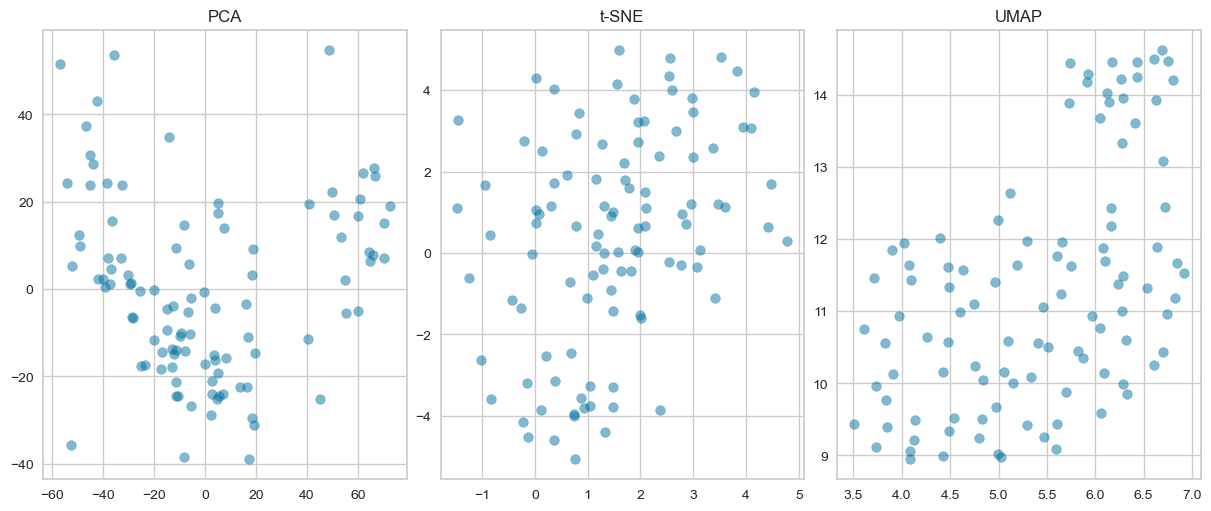

In [111]:
#Dimension reduction analysis
#Evaluate performance of different dimension reduction approaches for our model.
#Based on this, we can see that UMAP is probably the best dimension reducer to use for our model 
#UMAP reduces the data and clusters are more visible than in others. It also shows linear trend that could be helpful in clustering 
plt.rcParams['figure.figsize'] = [12, 5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(proteins_masked)

reducers = [PCA(), TSNE(), UMAP()]
reducers_names = ['PCA', 't-SNE', 'UMAP']

fig, axs = plt.subplots(1, 3, constrained_layout=True)

for i in range(3):
    embedding = reducers[i].fit_transform(scaled_data)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    axs[i].scatter(x_vals, y_vals, alpha=0.5)
    axs[i].set_title(reducers_names[i])
    

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


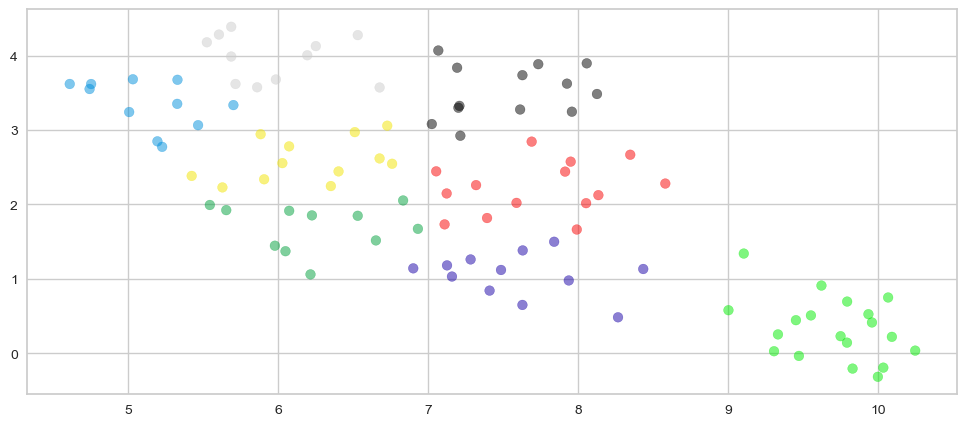

In [112]:
#Clustering models
#KMEANS CLUSTERING 
#Set up for graph
scaler = StandardScaler()
scaled_data = scaler.fit_transform(proteins_masked)

reducer = UMAP() # arbitrary for this demo
embedding = reducer.fit_transform(scaled_data)
x_vals = embedding[:, 0]
y_vals = embedding[:, 1]

cluster_model = KMeans()

labels = cluster_model.fit_predict(embedding)
plt.scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


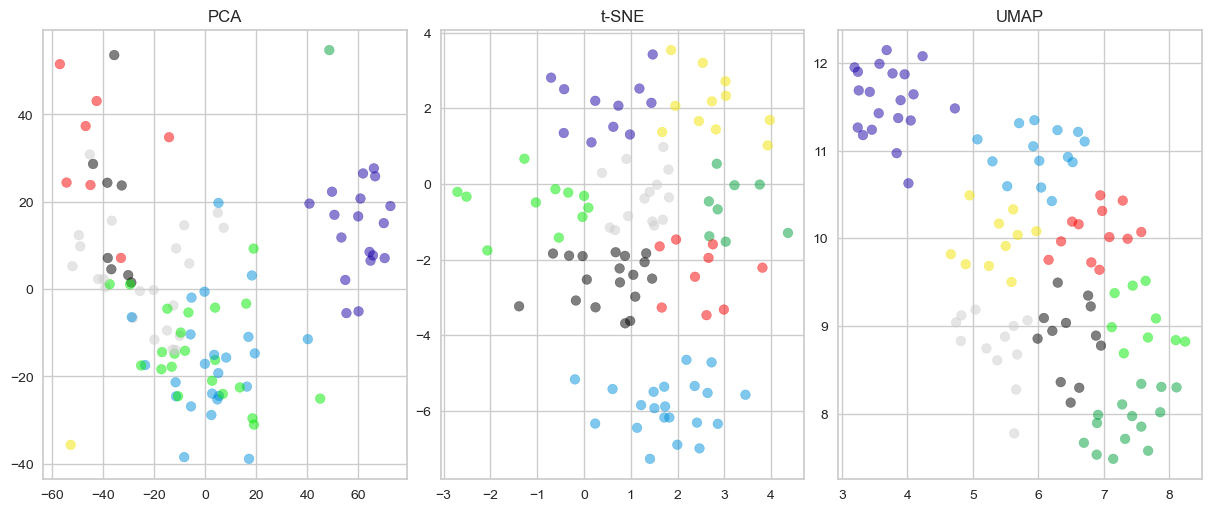

In [114]:
#CLUSTERING MODEL USING HDBSCAN 
plt.rcParams['figure.figsize'] = [12, 5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(proteins_masked)

model = HDBSCAN()

reducers = [
    PCA(),
    TSNE(),
    UMAP()
]
reducers_names = ['PCA', 't-SNE', 'UMAP']

fig, axs = plt.subplots(1, 3, constrained_layout=True)

    
for i in range(3):
    embedding = reducers[i].fit_transform(scaled_data)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    labels = cluster_model.fit_predict(embedding)
    axs[i].scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(reducers_names[i])



In [ ]:
#ASSESSING MODELS